In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import quad
from astropy.constants import c
from astropy import units as u
from scipy.integrate import quad
from scipy.optimize import curve_fit
Omega_m=0.3


In [ ]:
file_path =r"D:\Avani\ISA summer school\project 2.csv"
df=pd.read_csv(r"D:\Avani\ISA summer school\project 2.csv")


In [ ]:
df_clean = df.dropna()
df_clean = df.dropna(axis=1)
df=df_clean

In [ ]:
mean=df["zHD"].mean()
sd=df["zHD"].std()
lower_limit=mean -3*sd
higher_limit=mean + 3*sd

In [ ]:
df = df[(df['zHD'] >= lower_limit) & (df['zHD'] <= higher_limit)]

In [ ]:
distance = df['MU_SH0ES']         
redshift = df['zHD'] 
z=redshift

distance_error=df["MU_SH0ES_ERR_DIAG"]

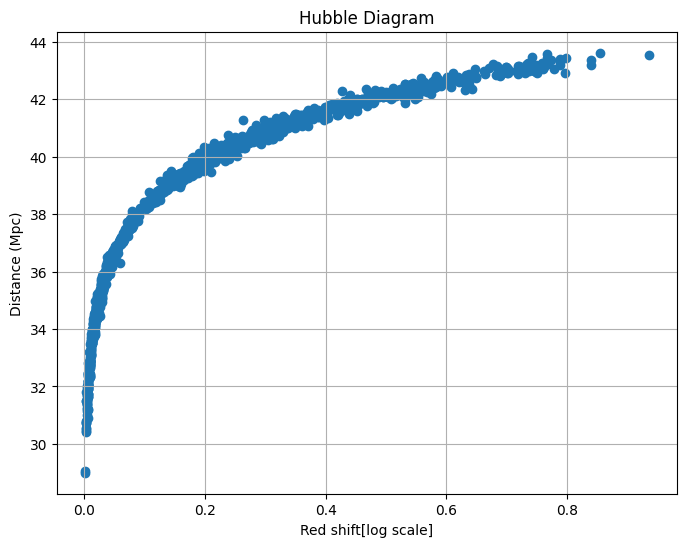

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(redshift,distance)
plt.ylabel("Distance (Mpc)")
plt.xlabel("Red shift[log scale]")
plt.title("Hubble Diagram")
plt.grid(True)
# two diagrams , one with log axis and one without


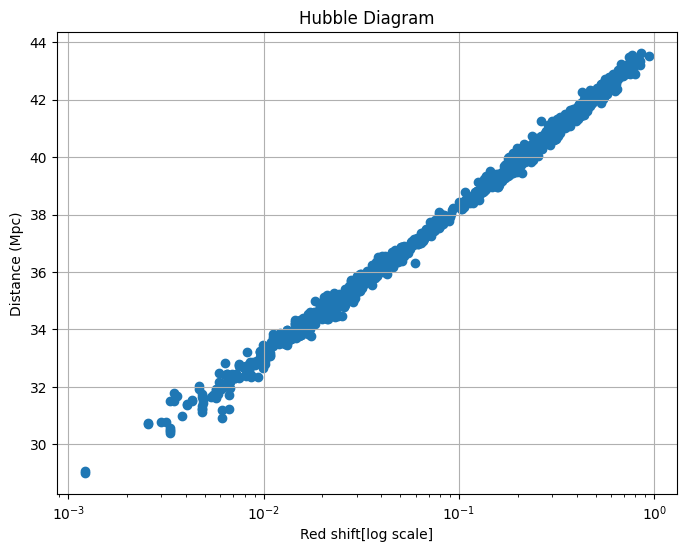

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(redshift,distance)
plt.xscale('log')
plt.ylabel("Distance (Mpc)")
plt.xlabel("Red shift[log scale]")
plt.title("Hubble Diagram")
plt.grid(True)


In [ ]:
H0=70 
Omega_m=0.3
def E(z, Omega_m):
    return np.sqrt(Omega_m * (1 + z)**3 + (1 - Omega_m))

def luminosity_distance(z, H0, Omega_m):
    c = 299792.458  # speed of light in km/s
    integral, _ = quad(lambda z_prime: 1.0 / E(z_prime, Omega_m), 0, z)
    dL = (1 + z) * (c / H0) * integral
    return dL

def mu_theory(z, H0, Omega_m):
    dL = luminosity_distance(z, H0, Omega_m)
    return 5 * np.log10(dL) + 25


In [ ]:
print(z.shape, distance.shape, distance_error.shape)

(1675,) (1675,) (1675,)


In [ ]:
def mu_model(z, H0, Omega_m):
    return mu_theory(z, H0, Omega_m)
p0 = [70, 0.3]
def luminosity_distance(z, H0, Omega_m):
    c = 299792.458  

  
    def integrand(z_prime, Omega_m):
        return 1.0 / E(z_prime, Omega_m)

   
    if np.ndim(z) > 0:
        integral = np.array([quad(integrand, 0, zi, args=(Omega_m,))[0] for zi in z])
    else:
        integral = quad(integrand, 0, z, args=(Omega_m,))[0]

    dL = (1 + z) * (c / H0) * integral
    return dL
popt, pcov = curve_fit(mu_model, z, distance, sigma=distance_error, p0=p0, absolute_sigma=True)

H0_fit, Omega_m_fit = popt
H0_err, Omega_m_err = np.sqrt(np.diag(pcov))


print(f"Fitted H₀ = {H0_fit:.2f} ± {H0_err:.2f} km/s/Mpc")
print(f"Fitted Ωₘ = {Omega_m_fit:.3f} ± {Omega_m_err:.3f}")

Fitted H₀ = 72.86 ± 0.27 km/s/Mpc
Fitted Ωₘ = 0.365 ± 0.020


In [ ]:
def Hubble_parameter(z, H0, Omega_m):
    return H0 * np.sqrt(Omega_m * (1 + z)**3 + (1 - Omega_m))

def age_of_universe(H0, Omega_m):
    
    H0_SI = H0 / (3.086e19) 
    integrand = lambda z: 1.0 / ((1 + z) * Hubble_parameter(z, H0_SI, Omega_m))    
    integral, _ = quad(integrand, 0, 1000)  
    seconds_in_Gyr = 3.154e16 
    age_gyr = integral / seconds_in_Gyr

    return age_gyr
    
t0 = age_of_universe(H0_fit, Omega_m_fit)
print(f"Estimated age of Universe: {t0:.2f} Gyr")

Estimated age of Universe: 12.25 Gyr


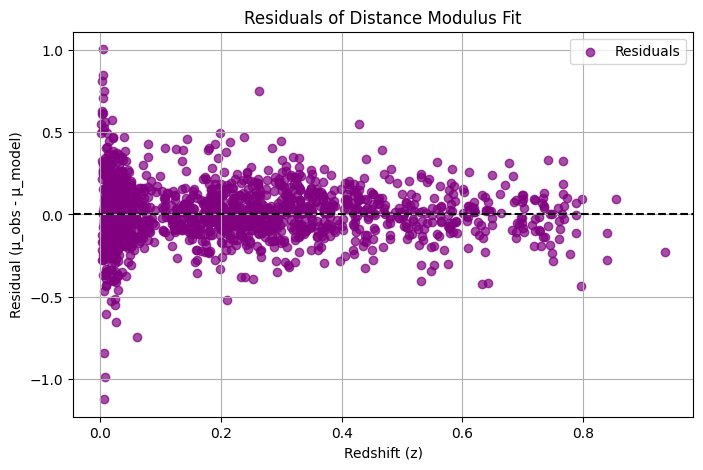

In [ ]:

residuals = distance - mu_model(z, H0_fit, Omega_m_fit)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(z, residuals, color='purple', alpha=0.7, label='Residuals')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Redshift (z)')
plt.ylabel('Residual (μ_obs - μ_model)')
plt.title('Residuals of Distance Modulus Fit')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def mu_fixed_Om(z, H0):
    return mu_theory(z, H0, Omega_m=0.3)

p0 = [70]

popt, pcov = curve_fit(mu_fixed_Om, z, distance, sigma=distance_error, p0=p0, absolute_sigma=True)

H0_fit_fixed = popt[0]
H0_err_fixed = np.sqrt(np.diag(pcov))[0]
print(f"Fitted H0 (with Omega_m=0.3): {H0_fit_fixed:.2f} ± {H0_err_fixed:.2f} km/s/Mpc")

Fitted H0 (with Omega_m=0.3): 73.55 ± 0.17 km/s/Mpc


In [ ]:
z_split = 0.1
low_mask = z < z_split
high_mask = z >= z_split

z_low = z[low_mask]
distance_low = distance[low_mask]
error_low = distance_error[low_mask]

z_high = z[high_mask]
distance_high = distance[high_mask]
error_high = distance_error[high_mask]

H0_low, _ = curve_fit(mu_fixed_Om, z_low, distance_low, sigma=error_low, p0=[70], absolute_sigma=True)


H0_high, _ = curve_fit(mu_fixed_Om, z_high, distance_high, sigma=error_high, p0=[70], absolute_sigma=True)

# Print results
print(f"Low-z (z < {z_split}):  H₀ = {H0_low[0]:.2f} km/s/Mpc")
print(f"High-z (z ≥ {z_split}): H₀ = {H0_high[0]:.2f} km/s/Mpc")

Low-z (z < 0.1):  H₀ = 73.01 km/s/Mpc
High-z (z ≥ 0.1): H₀ = 73.88 km/s/Mpc
